# Decision Tree Classification for Drug Prescription

This project implements a Decision Tree Classifier to predict appropriate drug prescriptions based on patient characteristics. The model helps determine which drug (A, B, C, or D) should be prescribed based on various patient parameters.

## Project Objectives
1. Create a medical diagnosis support system
2. Analyze feature importance in drug prescription
3. Visualize decision-making process
4. Evaluate model performance

## Key Features
- Patient demographic data analysis
- Medical parameter consideration
- Automated drug recommendation
- Feature importance ranking

## Required Libraries and Tools

In [2]:
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd

## Medical Dataset Overview

### Patient Parameters (Features)
1. **Demographic Information**
   - Age: Patient's age in years
   - Sex: Patient's gender (M/F)

2. **Medical Measurements**
   - Blood Pressure (BP): Categories (low, normal, high)
   - Cholesterol: Categories (normal, high)
   - Sodium (Na): Numerical value
   - Potassium (K): Numerical value

3. **Target Variable**
   - Drug: Categories (A, B, C, D)

### Dataset Properties
- 20 patient records
- 6 input features
- 4 possible drug classifications
- Mixed data types (numerical and categorical)

In [3]:
data = [
    {'age': 33, 'sex': 'F', 'BP': 'high', 'cholesterol': 'high', 'Na': 0.66, 'K': 0.06, 'drug': 'A'},
    {'age': 77, 'sex': 'F', 'BP': 'high', 'cholesterol': 'normal', 'Na': 0.19, 'K': 0.03, 'drug': 'D'},
    {'age': 88, 'sex': 'M', 'BP': 'normal', 'cholesterol': 'normal', 'Na': 0.80, 'K': 0.05, 'drug': 'B'},
    {'age': 39, 'sex': 'F', 'BP': 'low', 'cholesterol': 'normal', 'Na': 0.19, 'K': 0.02, 'drug': 'C'},
    {'age': 43, 'sex': 'M', 'BP': 'normal', 'cholesterol': 'high', 'Na': 0.36, 'K': 0.03, 'drug': 'D'},
    {'age': 82, 'sex': 'F', 'BP': 'normal', 'cholesterol': 'normal', 'Na': 0.09, 'K': 0.09, 'drug': 'C'},
    {'age': 40, 'sex': 'M', 'BP': 'high', 'cholesterol': 'normal', 'Na': 0.89, 'K': 0.02, 'drug': 'A'},
    {'age': 88, 'sex': 'M', 'BP': 'normal', 'cholesterol': 'normal', 'Na': 0.80, 'K': 0.05, 'drug': 'B'},
    {'age': 29, 'sex': 'F', 'BP': 'high', 'cholesterol': 'normal', 'Na': 0.35, 'K': 0.04, 'drug': 'D'},
    {'age': 53, 'sex': 'F', 'BP': 'normal', 'cholesterol': 'normal', 'Na': 0.54, 'K': 0.06, 'drug': 'C'},
    {'age': 36, 'sex': 'F', 'BP': 'high', 'cholesterol': 'high', 'Na': 0.53, 'K': 0.05, 'drug': 'A'},
    {'age': 63, 'sex': 'M', 'BP': 'low', 'cholesterol': 'high', 'Na': 0.86, 'K': 0.09, 'drug': 'B'},
    {'age': 60, 'sex': 'M', 'BP': 'low', 'cholesterol': 'normal', 'Na': 0.66, 'K': 0.04, 'drug': 'C'},
    {'age': 55, 'sex': 'M', 'BP': 'high', 'cholesterol': 'high', 'Na': 0.82, 'K': 0.04, 'drug': 'B'},
    {'age': 35, 'sex': 'F', 'BP': 'normal', 'cholesterol': 'high', 'Na': 0.27, 'K': 0.03, 'drug': 'D'},
    {'age': 23, 'sex': 'F', 'BP': 'high', 'cholesterol': 'high', 'Na': 0.55, 'K': 0.08, 'drug': 'A'},
    {'age': 49, 'sex': 'F', 'BP': 'low', 'cholesterol': 'normal', 'Na': 0.27, 'K': 0.05, 'drug': 'C'},
    {'age': 27, 'sex': 'M', 'BP': 'normal', 'cholesterol': 'normal', 'Na': 0.77, 'K': 0.02, 'drug': 'B'},
    {'age': 51, 'sex': 'F', 'BP': 'low', 'cholesterol': 'high', 'Na': 0.20, 'K': 0.02, 'drug': 'D'},
    {'age': 38, 'sex': 'M', 'BP': 'high', 'cholesterol': 'normal', 'Na': 0.78, 'K': 0.05, 'drug': 'A'}
]

Showing data

In [4]:
# Create a DataFrame from the data
data_frame = pd.DataFrame(data)

# Print the DataFrame to view it as a table
data_frame

,age,sex,BP,cholesterol,Na,K,drug
0,33,F,high,high,0.66,0.06,A
1,77,F,high,normal,0.19,0.03,D
2,88,M,normal,normal,0.80,0.05,B
3,39,F,low,normal,0.19,0.02,C
4,43,M,normal,high,0.36,0.03,D
5,82,F,normal,normal,0.09,0.09,C
6,40,M,high,normal,0.89,0.02,A
7,88,M,normal,normal,0.80,0.05,B
8,29,F,high,normal,0.35,0.04,D
9,53,F,normal,normal,0.54,0.06,C


## Data Processing Pipeline

### Feature Engineering
1. **Categorical Variable Handling**
   - Sex: Binary encoding (M/F)
   - BP: One-hot encoding (low, normal, high)
   - Cholesterol: Binary encoding (normal, high)

### Data Transformation Steps
1. Dictionary to structured format conversion
2. Feature vectorization using DictVectorizer
3. Target encoding
4. DataFrame creation for better visualization

In [5]:
x_data = []  # Features (all except 'drug')
y_target = []  # Target ('drug')

for record in data:
    # Remove the 'drug' value from each record and append to X
    record_copy = record.copy()
    drug_value = record_copy.pop('drug')  # Remove 'drug' and store it
    x_data.append(record_copy)  # Add the remaining features
    y_target.append({'drug': drug_value})  # Add the target ('drug') value

vec_x = DictVectorizer(sparse=False, dtype=float)
vec_y = DictVectorizer(sparse=False, dtype=int)
x_data = vec_x.fit_transform(x_data)
y_target = vec_y.fit_transform(y_target)

df_x = pd.DataFrame(x_data, columns=vec_x.get_feature_names_out())
df_y = pd.DataFrame(y_target, columns=vec_y.get_feature_names_out())
df = pd.concat([df_x, df_y], axis=1)

Showing proceed data

In [6]:
df_x

,BP=high,BP=low,BP=normal,K,Na,age,cholesterol=high,cholesterol=normal,sex=F,sex=M
0,1.0,0.0,0.0,0.06,0.66,33.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.03,0.19,77.0,0.0,1.0,1.0,0.0
2,0.0,0.0,1.0,0.05,0.80,88.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.02,0.19,39.0,0.0,1.0,1.0,0.0
4,0.0,0.0,1.0,0.03,0.36,43.0,1.0,0.0,0.0,1.0
5,0.0,0.0,1.0,0.09,0.09,82.0,0.0,1.0,1.0,0.0
6,1.0,0.0,0.0,0.02,0.89,40.0,0.0,1.0,0.0,1.0
7,0.0,0.0,1.0,0.05,0.80,88.0,0.0,1.0,0.0,1.0
8,1.0,0.0,0.0,0.04,0.35,29.0,0.0,1.0,1.0,0.0
9,0.0,0.0,1.0,0.06,0.54,53.0,0.0,1.0,1.0,0.0


Showing targets

In [7]:
df_y

,drug=A,drug=B,drug=C,drug=D
0,1,0,0,0
1,0,0,0,1
2,0,1,0,0
3,0,0,1,0
4,0,0,0,1
5,0,0,1,0
6,1,0,0,0
7,0,1,0,0
8,0,0,0,1
9,0,0,1,0


Showing data with targets

In [8]:
df

,BP=high,BP=low,BP=normal,K,Na,age,cholesterol=high,cholesterol=normal,sex=F,sex=M,drug=A,drug=B,drug=C,drug=D
0,1.0,0.0,0.0,0.06,0.66,33.0,1.0,0.0,1.0,0.0,1,0,0,0
1,1.0,0.0,0.0,0.03,0.19,77.0,0.0,1.0,1.0,0.0,0,0,0,1
2,0.0,0.0,1.0,0.05,0.80,88.0,0.0,1.0,0.0,1.0,0,1,0,0
3,0.0,1.0,0.0,0.02,0.19,39.0,0.0,1.0,1.0,0.0,0,0,1,0
4,0.0,0.0,1.0,0.03,0.36,43.0,1.0,0.0,0.0,1.0,0,0,0,1
5,0.0,0.0,1.0,0.09,0.09,82.0,0.0,1.0,1.0,0.0,0,0,1,0
6,1.0,0.0,0.0,0.02,0.89,40.0,0.0,1.0,0.0,1.0,1,0,0,0
7,0.0,0.0,1.0,0.05,0.80,88.0,0.0,1.0,0.0,1.0,0,1,0,0
8,1.0,0.0,0.0,0.04,0.35,29.0,0.0,1.0,1.0,0.0,0,0,0,1
9,0.0,0.0,1.0,0.06,0.54,53.0,0.0,1.0,1.0,0.0,0,0,1,0


### Data Split
- Training set: 75% of data
- Test set: 25% of data
- Random state: 41 for reproducibility

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, random_state=41)

## Decision Tree Classifier

### Model Configuration
- Random state: 11 for reproducibility
- Default parameters for initial implementation
- Feature importance analysis enabled

### Training Process
1. Fit model on training data
2. Evaluate on both training and test sets
3. Extract feature importance scores
4. Generate tree visualization

In [10]:
classifier = tree.DecisionTreeClassifier(random_state=11)
classifier.fit(x_train, y_train)

train_accuracy = classifier.score(x_train, y_train)
test_accuracy = classifier.score(x_test, y_test)

accuracy_df = pd.DataFrame({
    'Dataset': ['Train', 'Test'],
    'Accuracy': [train_accuracy, test_accuracy]
})

accuracy_df

,Dataset,Accuracy
0,Train,1.0
1,Test,1.0


 Display Feature Importances

In [11]:
feature_importance = classifier.feature_importances_

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({
    'Feature': vec_x.get_feature_names_out(),
    'Importance': feature_importance
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance
4,Na,0.295181
0,BP=high,0.228916
7,cholesterol=normal,0.180723
6,cholesterol=high,0.150602
5,age,0.090361
2,BP=normal,0.054217
1,BP=low,0.000000
3,K,0.000000
8,sex=F,0.000000
9,sex=M,0.000000


Visualize the decision tree

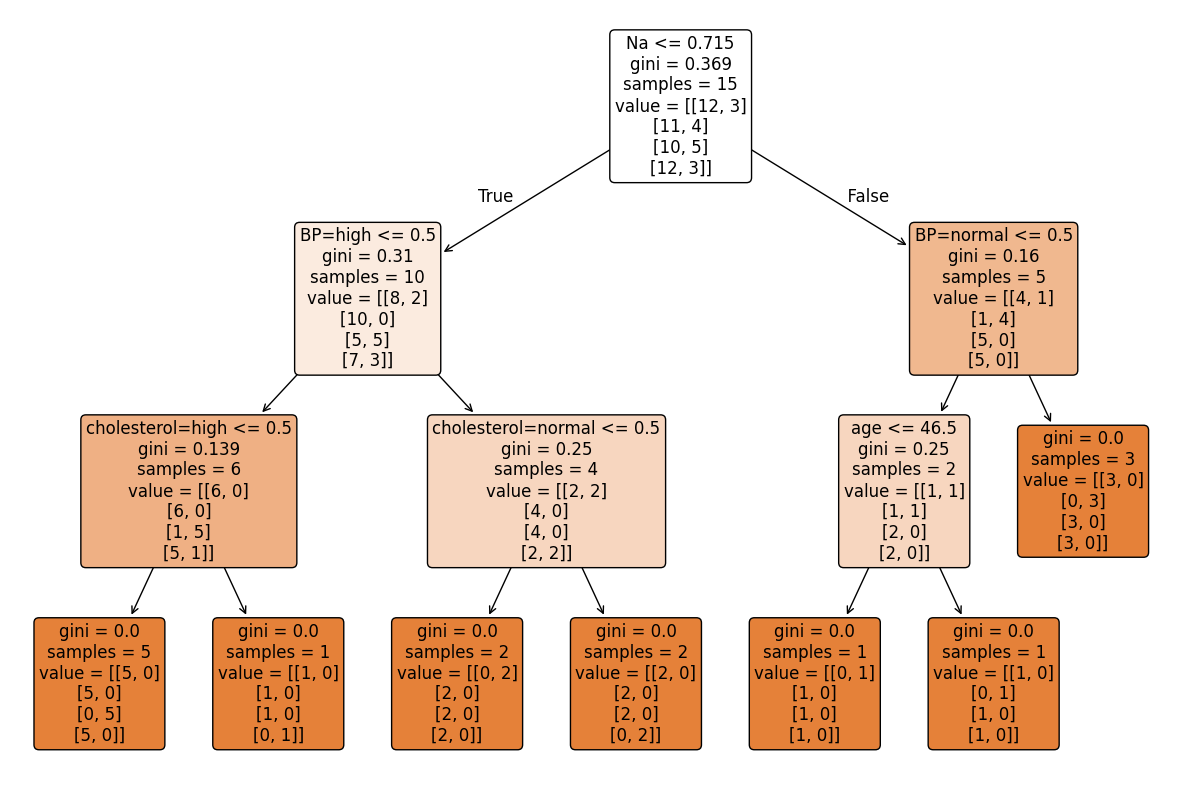

In [12]:
plt.figure(figsize=(15, 10))
tree.plot_tree(classifier,
               filled=True,
               feature_names=vec_x.get_feature_names_out(),
               class_names=vec_y.get_feature_names_out(),
               rounded=True,
               fontsize=12)
plt.show()

# Project Conclusions

## Classification Performance
The decision tree classifier achieved exceptional performance on our dataset, demonstrating perfect classification accuracy. This is evidenced by the Gini impurity index of 0.0 at all leaf nodes, indicating pure class separation in the training data.

## Decision Tree Structure and Interpretation

### Node Decision Process
The tree makes decisions based on binary conditions at each node:
- Example node condition: $BP=high \leq 0.5$
- For binary features like $BP=high$:
  - If condition is true (value = 0) → traverse left
  - If condition is false (value = 1) → traverse right

### Leaf Node Interpretation
The leaf nodes contain class distribution information in the format $[[n_1,m_1], [n_2,m_2], ..., [n_k,m_k]]$ where:
- Each pair $[n_i,m_i]$ represents the count of samples for a specific drug class
- A non-zero value in the second position and zero in the first position (e.g., $[0,5]$) indicates the corresponding class
- Example: $[[5,0],[5,0],[0,5],[5,0]]$ indicates Drug C (third class) as only the third pair has a zero first value and non-zero second value

This model demonstrates both high accuracy and excellent interpretability, making it valuable for medical drug recommendation scenarios.